### **Implementation of KMeans on the customer segmentation**

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Reading the csv file using pandas libarary

In [ ]:
Mall_data = pd.read_csv("/content/Mall_Customers.csv")

### 1st 5 rows of the data frame

In [ ]:
Mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Shape of the dataframe number of columns and rows

In [ ]:
Mall_data.shape

(200, 5)

### Info of the data frame , for null values and the data types of the features. The Gender feature is object data type,convert the feature into numerical values using label encode.

In [ ]:
Mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###Statistic of the data

In [ ]:
Mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###unique values present in features

In [ ]:
print(Mall_data["Age"].unique())
print("minimum: ",Mall_data["Age"].min())
print("maximum: ",Mall_data["Age"].max())

[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
minimum:  18
maximum:  70


In [ ]:
print(Mall_data["Annual Income (k$)"].unique())
print("minimum: ",Mall_data["Annual Income (k$)"].min())
print("maximum: ",Mall_data["Annual Income (k$)"].max())

[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
minimum:  15
maximum:  137


In [ ]:
print(Mall_data["Spending Score (1-100)"].unique())
print("minimum: ",Mall_data["Spending Score (1-100)"].min())
print("maximum: ",Mall_data["Spending Score (1-100)"].max())

[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]
minimum:  1
maximum:  99


### **Exploratory data analysis**
Start with box plot to see outliers are present in the features(Annual Income and Spending score). There are no outliers.

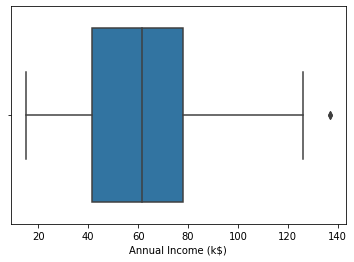

In [ ]:
sns.boxplot(x=Mall_data["Annual Income (k$)"])

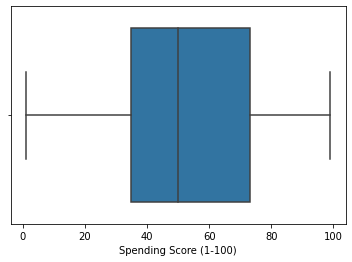

In [ ]:
sns.boxplot(x=Mall_data["Spending Score (1-100)"])

### scatter plot is displayed between the Annual Income and spending score. There are few clusters formed in the existing data frame. Roughly say 5 clusters

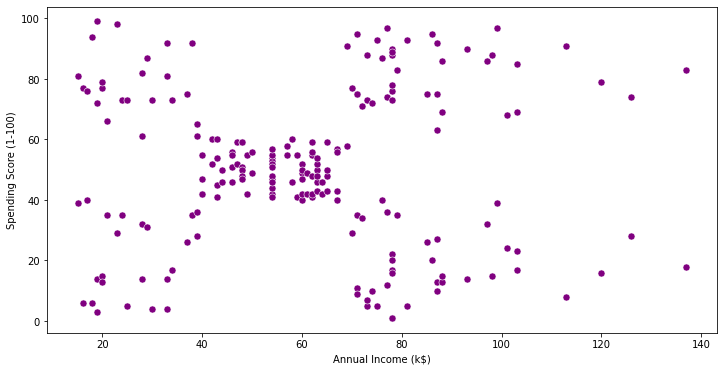

In [ ]:
import matplotlib.pyplot as plt
size=plt.figure()
size.set_figwidth(12)
size.set_figheight(6)
sns.scatterplot(x=Mall_data["Annual Income (k$)"],y=Mall_data["Spending Score (1-100)"],color="purple",s=50,marker="o")
plt.show()

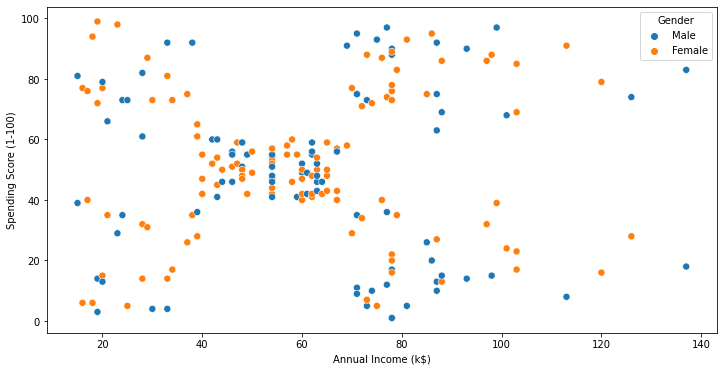

In [ ]:
import matplotlib.pyplot as plt
size=plt.figure()
size.set_figwidth(12)
size.set_figheight(6)
sns.scatterplot(x=Mall_data["Annual Income (k$)"],y=Mall_data["Spending Score (1-100)"],hue=Mall_data["Gender"], color="purple",s=50,marker="o")
plt.show()

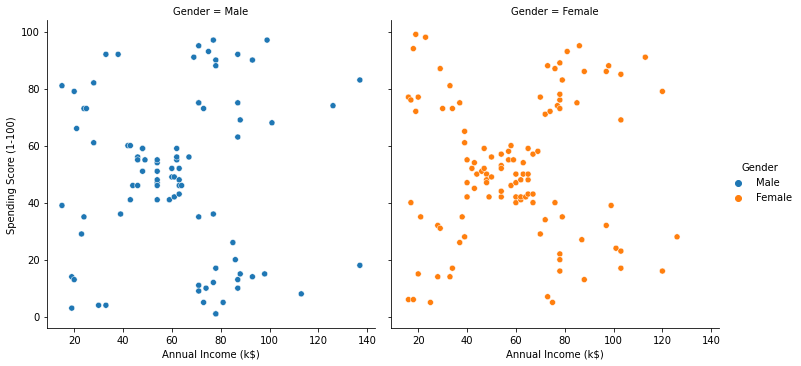

In [ ]:
sns.relplot(data=Mall_data, x="Annual Income (k$)", y="Spending Score (1-100)",col="Gender", hue="Gender",
    kind="scatter")

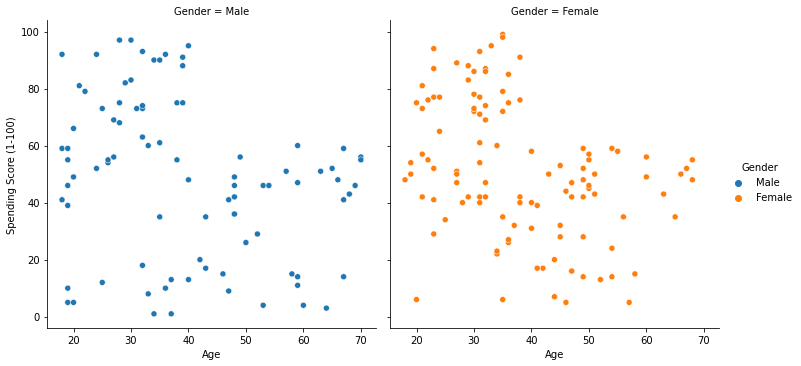

In [ ]:
sns.relplot(data=Mall_data, x="Age", y="Spending Score (1-100)",col="Gender", hue="Gender",
    kind="scatter")

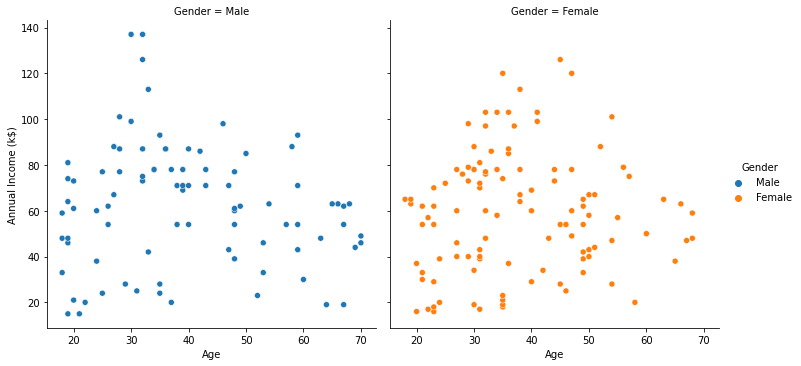

In [ ]:
sns.relplot(data=Mall_data, x="Age", y="Annual Income (k$)",col="Gender", hue="Gender",
    kind="scatter")

### According to each age group displaying the sum of the Annual income

In [ ]:
 data = Mall_data.groupby("Age")["Annual Income (k$)"].sum()

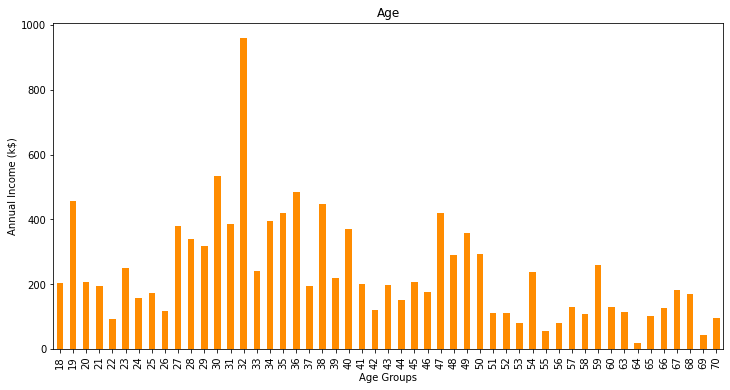

In [ ]:
size=plt.figure()
size.set_figwidth(12)
size.set_figheight(6)
data.plot.bar(title='Age', color='darkorange')
plt.xlabel('Age Groups')
plt.ylabel('Annual Income (k$)')
plt.show()

### According to age displaying the annual income by gender

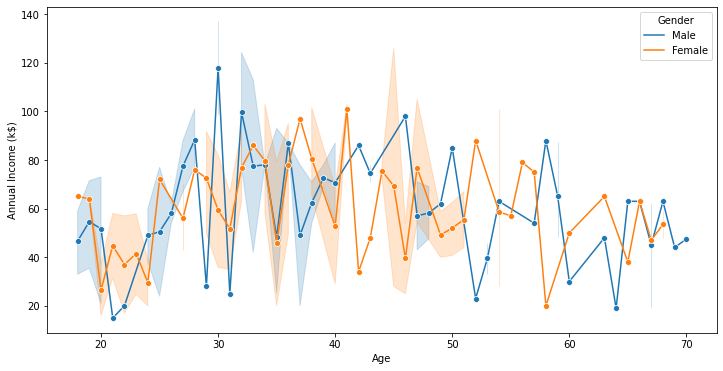

In [ ]:
import matplotlib.pyplot as plt
size=plt.figure()
size.set_figwidth(12)
size.set_figheight(6)
sns.lineplot(x=Mall_data["Age"],y= Mall_data["Annual Income (k$)"],hue=Mall_data["Gender"],color="red",marker="o")
plt.show()

####From below data the we can see that number of females are more compared to males and the Annual income of females is more than make and same for the spending score(1-100)

In [ ]:
Income_sum = Mall_data.groupby("Gender").sum()

In [ ]:
Income_sum

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,10927,4267,6636,5771
Male,9173,3503,5476,4269


In [ ]:
Gender_count = Mall_data.groupby("Gender").count()

In [ ]:
Gender_count

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,112,112,112,112
Male,88,88,88,88


In [ ]:
Age_count = Mall_data.groupby("Age").count()

In [ ]:
Age_count.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
18,4,4,4,4
19,8,8,8,8
20,5,5,5,5
21,5,5,5,5
22,3,3,3,3


### From below count plot the number Age 32 are more (11) and Age 55-56 are less (1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


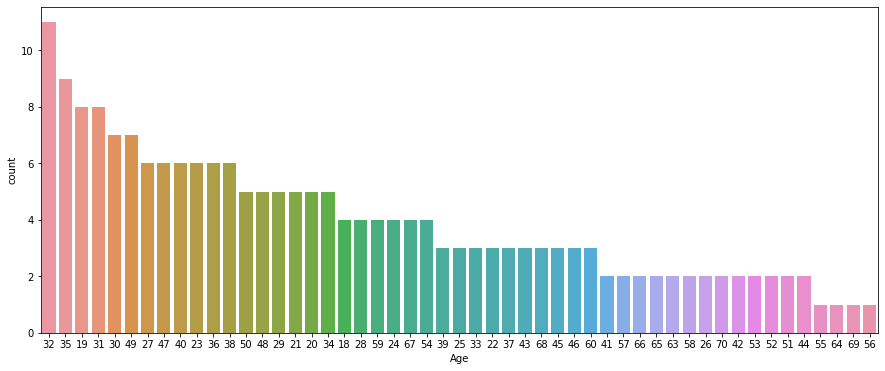

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
sns.countplot(Mall_data["Age"],order = Mall_data['Age'].value_counts().index)
plt.show()

### The count plot is for number of males and females in each age group.
####For Age 18 (Males-3,female -1),age-32(Males-5,female-6),age-70( male count is 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


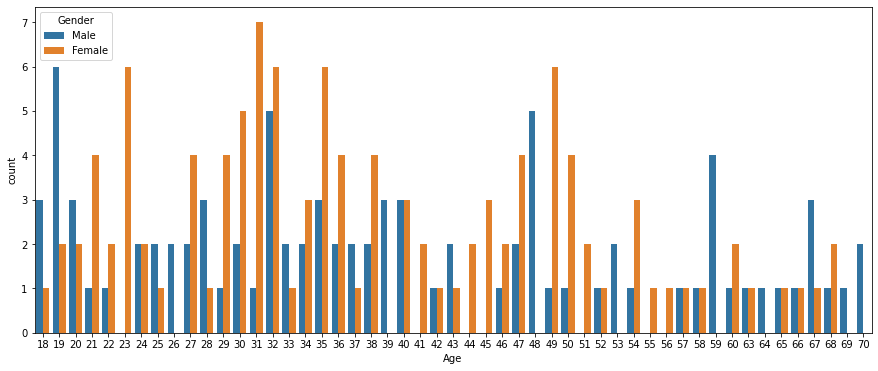

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
sns.countplot(Mall_data["Age"],hue=Mall_data["Gender"])
plt.show()

###label encoding Gender feature which is categorical is converted into numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(Mall_data["Gender"])
Mall_data["Gender"] = label_encoder.transform(Mall_data["Gender"])

### From here Building the model, before building the model finding the best k value(K- number of clusters) using elbow method.
plotting the graph between the sum of squared errors to the K values (integer value)

In [ ]:
SSE=[]
for i in range(1,10):
  k_means = KMeans(n_clusters=i)
  k_means.fit(Mall_data)
  SSE.append(k_means.inertia_)
SSE

[975512.0599999999,
 387065.71377137717,
 271384.5087828679,
 195393.50384615385,
 158165.84076802555,
 122601.93746732261,
 103203.14214665975,
 86053.67444777445,
 76915.6613507064]

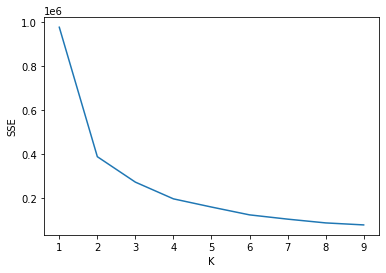

In [ ]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,10),SSE)

In [ ]:
k_means=KMeans(n_clusters=5)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Mall_data = Mall_data.drop("CustomerID",axis=1)

In [ ]:
Mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
y_pred=k_means.fit_predict(Mall_data)

In [ ]:
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
Mall_data["clusters"] = y_pred

In [ ]:
Mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


In [ ]:
k_means.cluster_centers_

array([[ 0.4125    , 42.9375    , 55.0875    , 49.7125    ],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

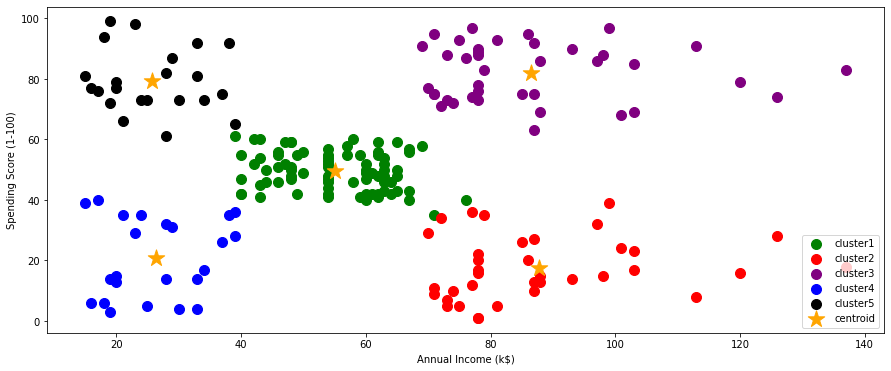

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)

Mall_data1=Mall_data[Mall_data.clusters==0]
Mall_data2=Mall_data[Mall_data.clusters==1]
Mall_data3=Mall_data[Mall_data.clusters==2]
Mall_data4=Mall_data[Mall_data.clusters==3]
Mall_data5=Mall_data[Mall_data.clusters==4]


plt.scatter(Mall_data1["Annual Income (k$)"],Mall_data1["Spending Score (1-100)"],color = "green" ,s=100,label="cluster1")
plt.scatter(Mall_data2["Annual Income (k$)"],Mall_data2["Spending Score (1-100)"],color = "red",s=100,label="cluster2" )
plt.scatter(Mall_data3["Annual Income (k$)"],Mall_data3["Spending Score (1-100)"],color = "purple",s=100,label="cluster3")
plt.scatter(Mall_data4["Annual Income (k$)"],Mall_data4["Spending Score (1-100)"],color = "blue",s=100,label="cluster4")
plt.scatter(Mall_data5["Annual Income (k$)"],Mall_data5["Spending Score (1-100)"],color = "black",s=100,label="cluster5")
plt.scatter(k_means.cluster_centers_[:,2],k_means.cluster_centers_[:,3],color="orange",marker="*",s=300,label="centroid")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
k_means1=KMeans(n_clusters=3)
k_means1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred1=k_means1.fit_predict(Mall_data)

In [ ]:
Mall_data["clusters1"] = y_pred1

In [ ]:
k_means1.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513,  2.        ],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829,  1.27642276],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895,  0.94736842]])

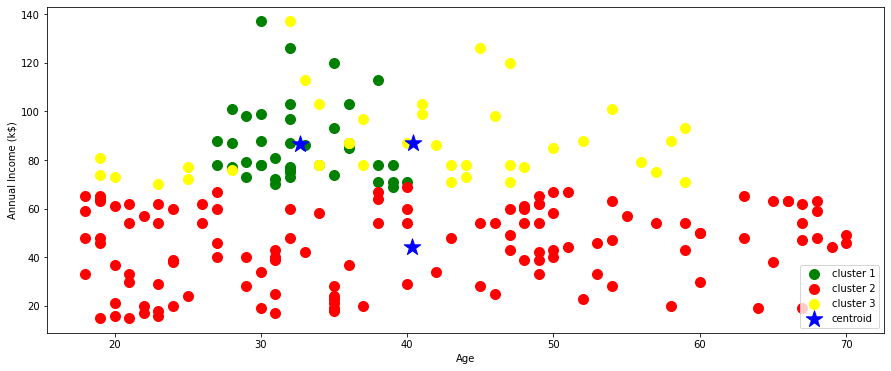

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
Mall_data1=Mall_data[Mall_data.clusters1==0]
Mall_data2=Mall_data[Mall_data.clusters1==1]
Mall_data3=Mall_data[Mall_data.clusters1==2]
#Mall_data4=Mall_data[Mall_data.clusters1==3]
#Mall_data5=Mall_data[Mall_data.clusters1==4]


plt.scatter(Mall_data1["Age"],Mall_data1["Annual Income (k$)"],color = "green" ,s=100,label="cluster 1")
plt.scatter(Mall_data2["Age"],Mall_data2["Annual Income (k$)"],color = "red",s=100,label="cluster 2" )
plt.scatter(Mall_data3["Age"],Mall_data3["Annual Income (k$)"],color = "yellow",s=100,label="cluster 3" )
#plt.scatter(Mall_data4["Age"],Mall_data4["Annual Income (k$)"],color = "purple",s=100,label="cluster 4" )
#plt.scatter(Mall_data5["Age"],Mall_data5["Annual Income (k$)"],color = "black",s=100,label="cluster 5" )
plt.scatter(k_means1.cluster_centers_[:,1],k_means1.cluster_centers_[:,2],color="blue",marker="*",s=300,label="centroid")

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
k_means2=KMeans(n_clusters=2)
k_means2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred2=k_means2.fit_predict(Mall_data)

In [ ]:
Mall_data["clusters2"] = y_pred2

In [ ]:
k_means2.cluster_centers_

array([[ 0.43478261, 46.16521739, 59.36521739, 32.88695652,  0.91304348,
         1.33043478],
       [ 0.44705882, 28.95294118, 62.17647059, 73.62352941,  1.95294118,
         0.54117647]])

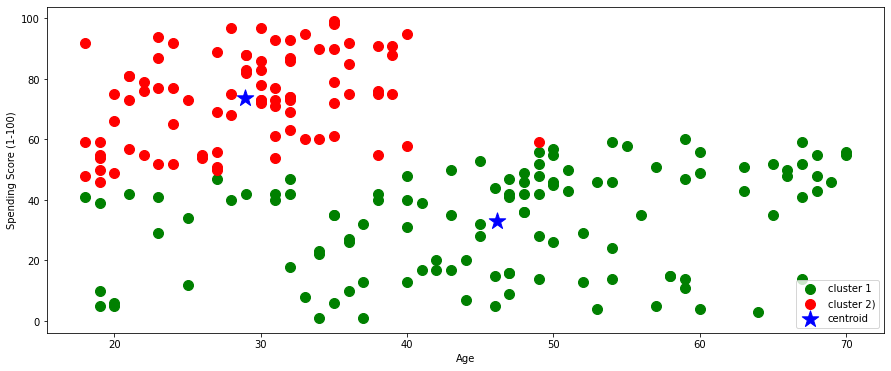

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
Mall_data1=Mall_data[Mall_data.clusters2==0]
Mall_data2=Mall_data[Mall_data.clusters2==1]
#Mall_data3=Mall_data[Mall_data.clusters2==2]
#Mall_data4=Mall_data[Mall_data.clusters2==3]


plt.scatter(Mall_data1["Age"],Mall_data1["Spending Score (1-100)"],color = "green" ,s=100,label="cluster 1")
plt.scatter(Mall_data2["Age"],Mall_data2["Spending Score (1-100)"],color = "red",s=100,label="cluster 2)" )
#plt.scatter(Mall_data3["Age"],Mall_data3["Spending Score (1-100)"],color = "yellow",s=100,label="cluster 3" )
#plt.scatter(Mall_data4["Age"],Mall_data4["Spending Score (1-100)"],color = "purple",s=100,label="cluster 4" )
plt.scatter(k_means2.cluster_centers_[:,1],k_means2.cluster_centers_[:,3],color="blue",marker="*",s=300,label="centroid")

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
scaler =MinMaxScaler()
Mall_data["Age"]= scaler.fit_transform(Mall_data[["Age"]])
Mall_data["Annual Income (k$)"]= scaler.fit_transform(Mall_data[["Annual Income (k$)"]])
Mall_data["Spending Score (1-100)"]= scaler.fit_transform(Mall_data[["Spending Score (1-100)"]])

In [ ]:
Mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,clusters1,clusters2
0,1,0.019231,0.000000,0.387755,3,1,0
1,1,0.057692,0.000000,0.816327,4,1,1
2,0,0.038462,0.008197,0.051020,3,1,0
3,0,0.096154,0.008197,0.775510,4,1,1
4,0,0.250000,0.016393,0.397959,3,1,0


In [ ]:
SSE=[]
for i in range(1,10):
  k_means = KMeans(n_clusters=i)
  k_means.fit(Mall_data)
  SSE.append(k_means.inertia_)
SSE

[596.3464821603595,
 246.51302206539026,
 166.2503153497991,
 110.50924065044032,
 82.36232115189901,
 61.93649863094529,
 48.30249729711966,
 38.604206298597425,
 29.386439081954627]

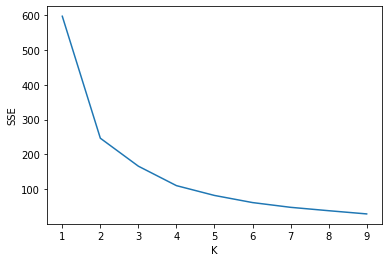

In [ ]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,10),SSE)

In [ ]:
k_means=KMeans(n_clusters=4)

In [ ]:
y_pred1=k_means.fit_predict(Mall_data)

In [ ]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [ ]:
Mall_data["new_cluster"] = y_pred1
Mall_data.drop("clusters",axis=1,inplace=True)

In [ ]:
Mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters1,clusters2,new_cluster
0,1,0.019231,0.000000,0.387755,1,0,1
1,1,0.057692,0.000000,0.816327,1,1,1
2,0,0.038462,0.008197,0.051020,1,0,1
3,0,0.096154,0.008197,0.775510,1,1,1
4,0,0.250000,0.016393,0.397959,1,0,1


In [ ]:
k_means.cluster_centers_

array([[ 4.10256410e-01,  4.83234714e-01,  3.24716267e-01,
         5.00261643e-01, -6.66133815e-16,  1.00000000e+00,
         3.07692308e-01],
       [ 4.00000000e-01,  3.35897436e-01,  9.03460838e-02,
         4.94784580e-01,  3.48888889e+00,  1.00000000e+00,
         4.88888889e-01],
       [ 5.26315789e-01,  4.30668016e-01,  5.90163934e-01,
         1.79914071e-01,  9.47368421e-01,  2.00000000e+00,
        -2.77555756e-16],
       [ 4.61538462e-01,  2.82544379e-01,  5.86380832e-01,
         8.27838828e-01,  2.00000000e+00,  2.22044605e-16,
         1.00000000e+00]])

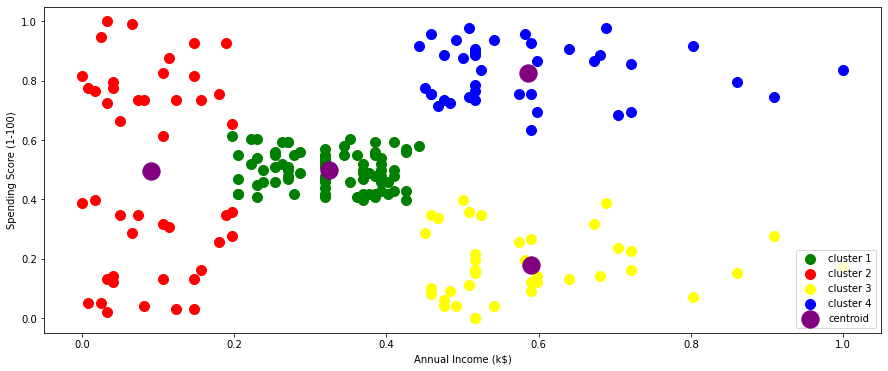

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
Mall_data1=Mall_data[Mall_data.new_cluster==0]
Mall_data2=Mall_data[Mall_data.new_cluster==1]
Mall_data3=Mall_data[Mall_data.new_cluster==2]
Mall_data4=Mall_data[Mall_data.new_cluster==3]
#Mall_data5=Mall_data[Mall_data.new_cluster==4]

plt.scatter(Mall_data1["Annual Income (k$)"],Mall_data1["Spending Score (1-100)"],color = "green" ,s=100,label="cluster 1")
plt.scatter(Mall_data2["Annual Income (k$)"],Mall_data2["Spending Score (1-100)"],color = "red",s=100,label="cluster 2" )
plt.scatter(Mall_data3["Annual Income (k$)"],Mall_data3["Spending Score (1-100)"],color = "yellow",s=100,label="cluster 3" )
plt.scatter(Mall_data4["Annual Income (k$)"],Mall_data4["Spending Score (1-100)"],color = "blue",s=100,label="cluster 4" )
#plt.scatter(Mall_data5["Annual Income (k$)"],Mall_data5["Spending Score (1-100)"],color = "black",s=100,label="cluster 5" )
plt.scatter(k_means.cluster_centers_[:,2],k_means.cluster_centers_[:,3],color="purple",marker="o",s=300,label="centroid")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
k_means1=KMeans(n_clusters=4)

In [ ]:
y_pred1=k_means1.fit_predict(Mall_data)

In [ ]:
Mall_data["new_cluster1"] = y_pred1

In [ ]:
k_means1.cluster_centers_

array([[ 5.26315789e-01,  4.30668016e-01,  5.90163934e-01,
         1.79914071e-01,  2.00000000e+00, -2.77555756e-16,
         2.00000000e+00],
       [ 4.34782609e-01,  1.49665552e-01,  2.17391304e-01,
         6.67480035e-01,  1.00000000e+00,  1.00000000e+00,
         4.78260870e-01],
       [ 4.61538462e-01,  2.82544379e-01,  5.86380832e-01,
         8.27838828e-01,  2.22044605e-16,  1.00000000e+00,
         3.00000000e+00],
       [ 3.89610390e-01,  5.96403596e-01,  2.51862891e-01,
         3.97164060e-01,  1.00000000e+00, -3.88578059e-16,
         2.98701299e-01]])

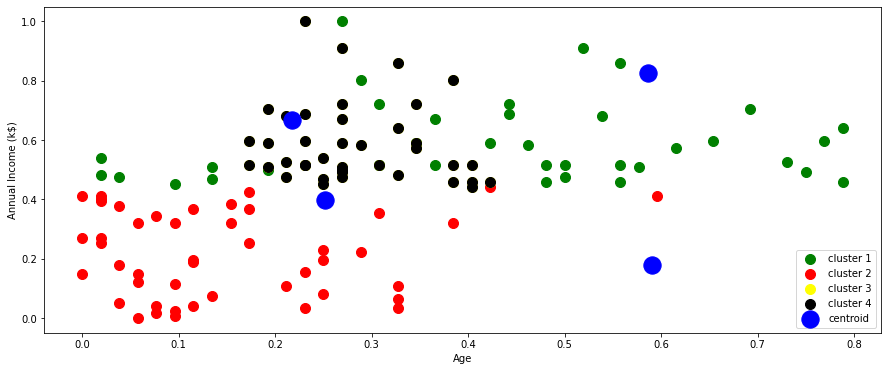

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
Mall_data1=Mall_data[Mall_data.new_cluster1==0]
Mall_data2=Mall_data[Mall_data.new_cluster1==1]
Mall_data3=Mall_data[Mall_data.new_cluster1==2]
Mall_data4=Mall_data[Mall_data.new_cluster==3]
#Mall_data5=Mall_data[Mall_data.new_cluster==4]

plt.scatter(Mall_data1["Age"],Mall_data1["Annual Income (k$)"],color = "green" ,s=100,label="cluster 1")
plt.scatter(Mall_data2["Age"],Mall_data2["Annual Income (k$)"],color = "red",s=100,label="cluster 2" )
plt.scatter(Mall_data3["Age"],Mall_data3["Annual Income (k$)"],color = "yellow",s=100,label="cluster 3" )
plt.scatter(Mall_data4["Age"],Mall_data4["Annual Income (k$)"],color = "black",s=100,label="cluster 4" )
#plt.scatter(Mall_data5["Age"],Mall_data5["Annual Income (k$)"],color = "purple",s=100,label="cluster 5" )
plt.scatter(k_means1.cluster_centers_[:,2],k_means1.cluster_centers_[:,3],color="blue",marker="o",s=300,label="centroid")

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
k_means2=KMeans(n_clusters=2)

In [ ]:
y_pred2=k_means2.fit_predict(Mall_data)

In [ ]:
Mall_data["new_cluster2"] = y_pred2

In [ ]:
k_means2.cluster_centers_

array([[ 4.71544715e-01,  2.78611632e-01,  4.49553512e-01,
         5.67695371e-01,  9.91869919e-01,  6.91056911e-01,
         1.74796748e+00,  1.00813008e+00],
       [ 3.89610390e-01,  5.96403596e-01,  2.51862891e-01,
         3.97164060e-01,  1.00000000e+00, -3.88578059e-16,
         2.98701299e-01,  3.00000000e+00]])

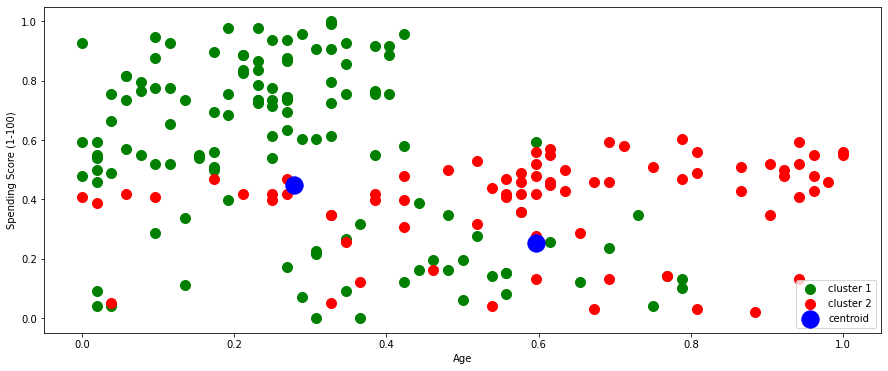

In [ ]:
size=plt.figure()
size.set_figwidth(15)
size.set_figheight(6)
Mall_data1=Mall_data[Mall_data.new_cluster2==0]
Mall_data2=Mall_data[Mall_data.new_cluster2==1]
#Mall_data3=Mall_data[Mall_data.new_cluster==2]
#Mall_data4=Mall_data[Mall_data.new_cluster==3]
#Mall_data5=Mall_data[Mall_data.new_cluster==4]

plt.scatter(Mall_data1["Age"],Mall_data1["Spending Score (1-100)"],color = "green" ,s=100,label="cluster 1")
plt.scatter(Mall_data2["Age"],Mall_data2["Spending Score (1-100)"],color = "red",s=100,label="cluster 2" )
#plt.scatter(Mall_data3["Age"],Mall_data3["Spending Score (1-100)"],color = "yellow",s=100,label="cluster 3" )
#plt.scatter(Mall_data4["Age"],Mall_data4["Spending Score (1-100)"],color = "purple",s=100,label="cluster 4" )
#plt.scatter(Mall_data5["Age"],Mall_data5["Spending Score (1-100)"],color = "purple",s=100,label="cluster 5" )
plt.scatter(k_means2.cluster_centers_[:,1],k_means2.cluster_centers_[:,2],color="blue",marker="o",s=300,label="centroid")

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc="lower right")
plt.show()